In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
walmart=pd.read_csv('Walmart DataSet.csv')
walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
import pandas as pd



walmart['Date'] = pd.to_datetime(walmart['Date'])


missing_values = walmart.isnull().sum()
print("Missing Values:")
print(missing_values)


summary_stats = walmart.describe()
print("\nSummary Statistics:")
print(summary_stats)


Missing Values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Summary Statistics:
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.3567

In [5]:

correlation_sales_unemployment = walmart['Weekly_Sales'].corr(walmart['Unemployment'])

print("Correlation between Weekly Sales and Unemployment Rate:", correlation_sales_unemployment)


store_correlation = walmart.groupby('Store')['Weekly_Sales', 'Unemployment'].corr().iloc[0::2,-1].reset_index()
store_correlation = store_correlation.rename(columns={'Unemployment': 'Correlation'})
worst_suffering_stores = store_correlation.sort_values(by='Correlation', ascending=True)

print("\nStores suffering the most due to Unemployment Rate:")
print(worst_suffering_stores.head())


Correlation between Weekly Sales and Unemployment Rate: -0.10617608965795416

Stores suffering the most due to Unemployment Rate:
    Store       level_1  Correlation
37     38  Weekly_Sales    -0.785290
43     44  Weekly_Sales    -0.780076
38     39  Weekly_Sales    -0.384681
41     42  Weekly_Sales    -0.356355
40     41  Weekly_Sales    -0.350630


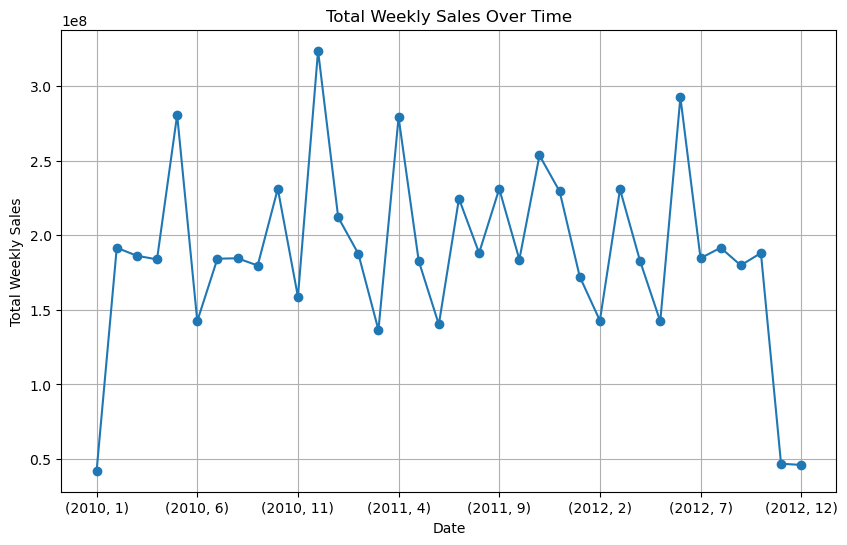

In [6]:
import matplotlib.pyplot as plt


walmart['Month'] = walmart['Date'].dt.month
walmart['Year'] = walmart['Date'].dt.year

monthly_sales = walmart.groupby(['Year', 'Month'])['Weekly_Sales'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o')
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()


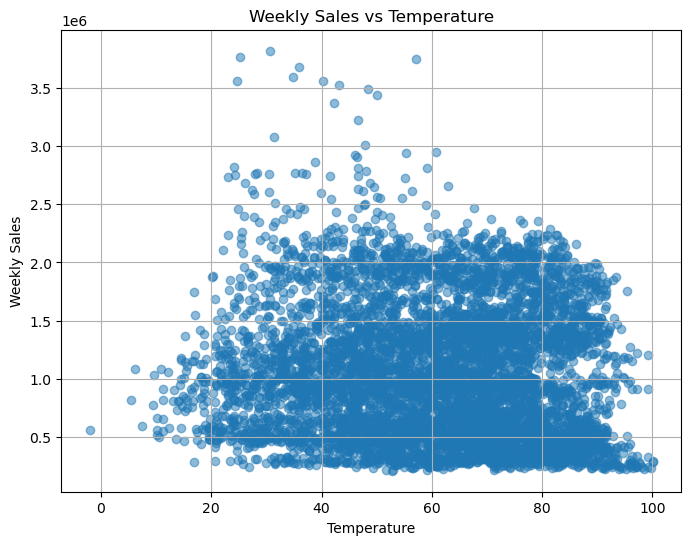

Correlation between Weekly Sales and Temperature: -0.06381001317946963


In [7]:

plt.figure(figsize=(8, 6))
plt.scatter(walmart['Temperature'], walmart['Weekly_Sales'], alpha=0.5)
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()


correlation_sales_temperature = walmart['Weekly_Sales'].corr(walmart['Temperature'])
print("Correlation between Weekly Sales and Temperature:", correlation_sales_temperature)


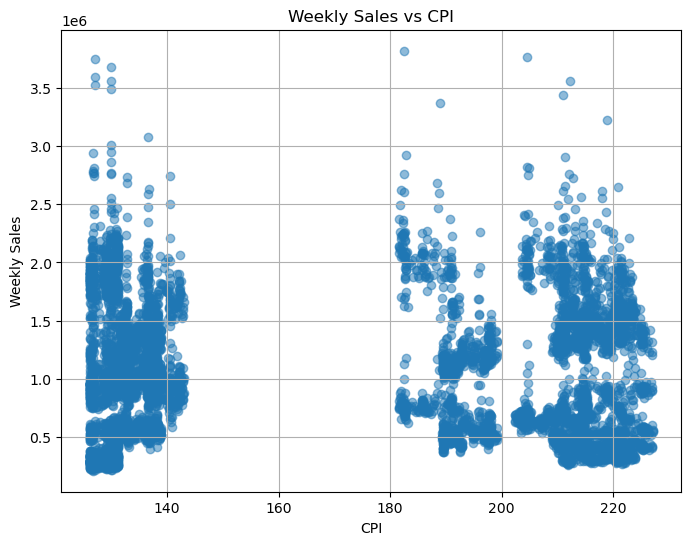

Correlation between Weekly Sales and CPI: -0.07263416204017643


In [8]:

plt.figure(figsize=(8, 6))
plt.scatter(walmart['CPI'], walmart['Weekly_Sales'], alpha=0.5)
plt.title('Weekly Sales vs CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()


correlation_sales_cpi = walmart['Weekly_Sales'].corr(walmart['CPI'])
print("Correlation between Weekly Sales and CPI:", correlation_sales_cpi)


In [9]:

total_sales_per_store = walmart.groupby('Store')['Weekly_Sales'].sum()


top_performing_stores = total_sales_per_store.sort_values(ascending=False)

print("Top Performing Stores (Based on Total Sales):")
print(top_performing_stores.head())


Top Performing Stores (Based on Total Sales):
Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


In [10]:

worst_performing_store = total_sales_per_store.sort_values()

print("Worst Performing Store (Based on Total Sales):")
print(worst_performing_store.head(1))


Worst Performing Store (Based on Total Sales):
Store
33    37160221.96
Name: Weekly_Sales, dtype: float64


In [11]:

highest_sales = top_performing_stores.iloc[0]
lowest_sales = worst_performing_store.iloc[0]
percentage_difference = ((highest_sales - lowest_sales) / highest_sales) * 100

print("Percentage Difference in Total Sales between Highest and Lowest Performing Stores:", percentage_difference, "%")



Percentage Difference in Total Sales between Highest and Lowest Performing Stores: 87.67070533042084 %


In [14]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX






def train_and_forecast_sales(data, store_id):
    store_data = data[data['Store'] == store_id]['Weekly_Sales']
    model = SARIMAX(store_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=12)
    return forecast


forecasted_sales = {}
for store_id in walmart['Store'].unique():
    forecast = train_and_forecast_sales(walmart, store_id)
    forecasted_sales[store_id] = forecast

# Display forecasted sales for each store
for store_id, forecast in forecasted_sales.items():
    print(f"Forecasted sales for Store {store_id}:")
    print(forecast)


C:\Users\vighn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vighn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vighn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vighn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vighn\anaconda3\lib\site-

Forecasted sales for Store 1:
143    1.421157e+06
144    1.511237e+06
145    1.498984e+06
146    1.571846e+06
147    1.510895e+06
148    1.472766e+06
149    1.497334e+06
150    1.504977e+06
151    1.498639e+06
152    1.497632e+06
153    1.511394e+06
154    1.588019e+06
Name: predicted_mean, dtype: float64
Forecasted sales for Store 2:
143    1.709647e+06
144    1.818715e+06
145    1.833277e+06
146    1.946534e+06
147    1.790230e+06
148    1.757251e+06
149    1.805713e+06
150    1.806947e+06
151    1.796017e+06
152    1.812438e+06
153    1.827277e+06
154    1.938755e+06
Name: predicted_mean, dtype: float64
Forecasted sales for Store 3:
143    388216.857330
144    404162.782107
145    412566.886030
146    413998.263854
147    404024.811671
148    397529.323968
149    410445.089823
150    399799.721385
151    415801.653782
152    408450.567752
153    416225.871744
154    425200.567920
Name: predicted_mean, dtype: float64
Forecasted sales for Store 4:
143    2.041562e+06
144    2.144343e+

C:\Users\vighn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
import pandas as pd


forecasted_sales = {
    "Store 1": [1.421157e+06, 1.511237e+06, 1.498984e+06, 1.571846e+06, 1.510895e+06, 1.472766e+06, 1.497334e+06, 1.504977e+06, 1.498639e+06, 1.497632e+06, 1.511394e+06, 1.588019e+06],
    "Store 2": [1.709647e+06, 1.818715e+06, 1.833277e+06, 1.946534e+06, 1.790230e+06, 1.757251e+06, 1.805713e+06, 1.806947e+06, 1.796017e+06, 1.812438e+06, 1.827277e+06, 1.938755e+06],
    "Store 3": [388216.857330, 404162.782107, 412566.886030, 413998.263854, 404024.811671, 397529.323968, 410445.089823, 399799.721385, 415801.653782, 408450.567752, 416225.871744, 425200.567920],
    "Store 4": [2.041562e+06, 2.144343e+06, 2.151268e+06, 2.221072e+06, 2.092061e+06, 2.075226e+06, 2.117922e+06, 2.108841e+06, 2.102557e+06, 2.120777e+06, 2.127436e+06, 2.254843e+06],
    "Store 5": [301629.058861, 316485.721451, 322151.589891, 332790.165670, 324724.096573, 305834.757455, 314847.238824, 322344.244606, 322412.734846, 319636.809513, 319885.382648, 337477.321740],
    "Store 6": [1.326060e+06, 1.393026e+06, 1.420462e+06, 1.514057e+06, 1.404896e+06, 1.321009e+06, 1.373889e+06, 1.398986e+06, 1.343666e+06, 1.362866e+06, 1.382155e+06, 1.474965e+06],
    "Store 7": [459097.095035, 472987.969025, 494657.649833, 549795.686471, 516264.938094, 495388.657393, 491468.902104, 506271.297546, 457257.563632, 463571.544026, 468118.563747, 519225.951122],
    "Store 8": [856652.167091, 888352.748541, 914389.420603, 953022.732682, 885269.091387, 872350.628673, 883006.468157, 898874.554735, 888383.687508, 897320.218500, 904271.287404, 948172.661280],
    "Store 9": [517610.484047, 538699.156080, 560763.165157, 577024.023273, 541794.325400, 532093.760057, 542536.372734, 545777.050395, 550092.457073, 546778.369376, 548325.312679, 585263.155221],
    "Store 10": [1.589181e+06, 1.684137e+06, 1.684609e+06, 1.746737e+06, 1.630742e+06, 1.583527e+06, 1.626618e+06, 1.662555e+06, 1.620476e+06, 1.668422e+06, 1.696395e+06, 1.759275e+06]
}


sales_df = pd.DataFrame(forecasted_sales)


total_sales = sales_df.sum()


store_with_highest_sales = total_sales.idxmax()
highest_total_sales = total_sales.max()

store_with_highest_sales, highest_total_sales
